# Exploratory Data Analysis aka EDA only

In [1]:
import os
import sys

sys.path.append(os.path.abspath(os.path.join('..'))) # imports top level

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import display
import scipy

In [2]:

df = pd.read_excel("input.xlsx", sheet_name="no_burnup")

In [3]:
df.columns

Index(['Name', 'pmar', 'p, %', 'p, beff', '7-6_s', '7-5_s', '7-4_s', '7-3_s',
       '6-6_s', '6-5_s', '6-4_s', '6-3_s', '5-6_s', '5-3_s', '4-6_s', '4-3_s',
       '3-6_s', '3-5_s', '3-4_s', '3-3_s', '2-6_s', '2-5_s', '2-4_s', '2-3_s',
       '7-6_b', '7-5_b', '7-4_b', '7-3_b', '6-6_b', '6-5_b', '6-4_b', '6-3_b',
       '5-6_b', '5-3_b', '4-6_b', '4-3_b', '3-6_b', '3-5_b', '3-4_b', '3-3_b',
       '2-6_b', '2-5_b', '2-4_b', '2-3_b', '7-6_t', '7-5_t', '7-4_t', '7-3_t',
       '6-6_t', '6-5_t', '6-4_t', '6-3_t', '5-6_t', '5-3_t', '4-6_t', '4-3_t',
       '3-6_t', '3-5_t', '3-4_t', '3-3_t', '2-6_t', '2-5_t', '2-4_t', '2-3_t',
       'Temperature, K', 'p loss due to temperature, %', 'Notes'],
      dtype='object')

In [4]:
df.describe()

,pmar,"p, %","p, beff",7-6_s,7-5_s,7-4_s,7-3_s,6-6_s,6-5_s,6-4_s,...,3-6_t,3-5_t,3-4_t,3-3_t,2-6_t,2-5_t,2-4_t,2-3_t,"Temperature, K","p loss due to temperature, %"
count,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,...,182.0,182.0,182.0,182.0,182.000000,182.0,182.0,182.0,182.000000,182.000000
mean,1.058861,5.643533,7.189214,0.837247,0.975383,0.981942,0.927160,0.894449,1.071390,1.087223,...,265.0,265.0,265.0,265.0,287.307692,300.0,300.0,300.0,300.969780,-0.114434
std,0.018754,1.672018,2.129959,0.200180,0.159770,0.164817,0.170770,0.194074,0.188727,0.183867,...,0.0,0.0,0.0,0.0,16.873067,0.0,0.0,0.0,6.400571,0.056325
min,1.021710,2.230769,2.841744,0.477689,0.642833,0.557562,0.665724,0.553706,0.710634,0.725046,...,265.0,265.0,265.0,265.0,265.000000,300.0,300.0,300.0,289.000000,-0.220300
25%,1.043610,4.327140,5.512280,0.646082,0.837235,0.861721,0.780588,0.725079,0.898613,0.928377,...,265.0,265.0,265.0,265.0,265.000000,300.0,300.0,300.0,295.500000,-0.176300
50%,1.057325,5.537927,7.054684,0.847995,1.021672,1.008968,0.904925,0.860203,1.097830,1.099869,...,265.0,265.0,265.0,265.0,300.000000,300.0,300.0,300.0,300.000000,-0.105900
75%,1.072840,6.908556,8.800708,1.021151,1.096429,1.109961,1.029773,1.038331,1.225421,1.242928,...,265.0,265.0,265.0,265.0,300.000000,300.0,300.0,300.0,308.000000,-0.066300
max,1.105480,9.761857,12.435486,1.245396,1.292089,1.325074,1.357336,1.365215,1.462137,1.443561,...,265.0,265.0,265.0,265.0,300.000000,300.0,300.0,300.0,313.000000,-0.009100


In [5]:
d = display.Display(df=df)
d.quick_processing()

The columns with prefix  are not in DataFrame


In [6]:
percentage_cols =  d.CORE_PARTS["percentage"]["ALL_CELLS"]

d.df.loc[:, percentage_cols] = d.df.loc[:, d.CORE_PARTS["burnup"]["ALL_CELLS"]].to_numpy() / d.df.loc[:, d.CORE_PARTS["fuel_type"]["ALL_CELLS"]].to_numpy() * 100

In [7]:
fuel_left_cols = d.CORE_PARTS["left"]["ALL_CELLS"]

d.df.loc[:, fuel_left_cols] = d.df.loc[:, d.CORE_PARTS["fuel_type"]["ALL_CELLS"]].to_numpy() - d.df.loc[:, d.CORE_PARTS["burnup"]["ALL_CELLS"]].to_numpy()

In [8]:
d.df["average_p"] = d.df.loc[:, percentage_cols].mean(axis=1)

In [9]:
d.df["average_l"] = d.df.loc[:, fuel_left_cols].mean(axis=1)

In [10]:
df = d.df

In [11]:
d.display(data=df.loc[44, :], dt="_s", show_cmap=False)

,6,5,4,3
7,0.613702,0.788273,1.030147,0.865365
6,1.086344,0.888343,1.239782,1.147916
5,0.846959,NaN,NaN,1.640627
4,0.826114,NaN,NaN,1.496309
3,0.774774,1.129502,0.914296,1.153217
2,0.700188,0.919165,1.136769,0.802209


In [12]:
d.display(data=df.loc[44, :], dt="_p")

,6,5,4,3
7,57.980000,49.930000,29.400000,51.920000
6,5.090000,50.900000,29.610000,38.310000
5,48.920000,nan,nan,10.020000
4,52.870000,nan,nan,21.580000
3,46.410000,26.550000,52.600000,35.920000
2,47.730000,29.990000,10.320000,54.100000


In [13]:
d.display(ind=0, sel_cols=d.CORE_PARTS["coef"]["ALL_CELLS"], dt="_s")

,6,5,4,3
7,1.051558,0.790403,1.013165,1.037370
6,0.912569,1.189814,0.834644,1.353862
5,0.911516,nan,nan,1.474590
4,0.998171,nan,nan,1.225385
3,0.887513,0.759753,1.137373,1.230191
2,0.644860,1.030717,0.609676,0.906869


In [14]:
d.display(ind=0, sel_cols=["qul_s", "qur_s", "qll_s", "qlr_s"], dt="_s", mode="q")

,1,2
1,0.971172,1.142726
2,0.864203,1.021899


<Axes: xlabel='4-6_s', ylabel='Count'>

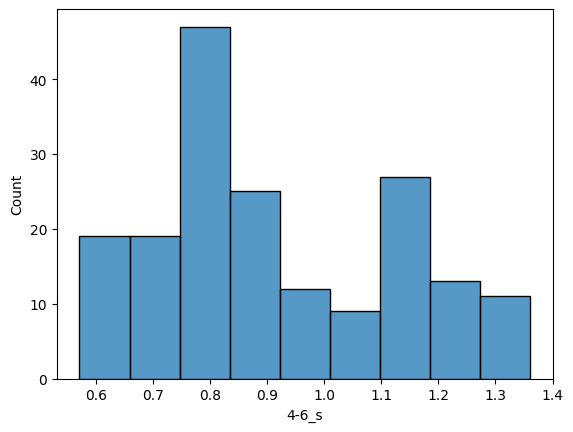

In [15]:
sns.histplot(df["4-6_s"])

[[<Axes: > <Axes: > <Axes: > <Axes: > <Axes: >]
 [<Axes: > <Axes: > <Axes: > <Axes: > <Axes: >]]
7-6_b
7-5_b
7-4_b
7-3_b
6-6_b
6-5_b
6-4_b
6-3_b
5-6_b
5-3_b


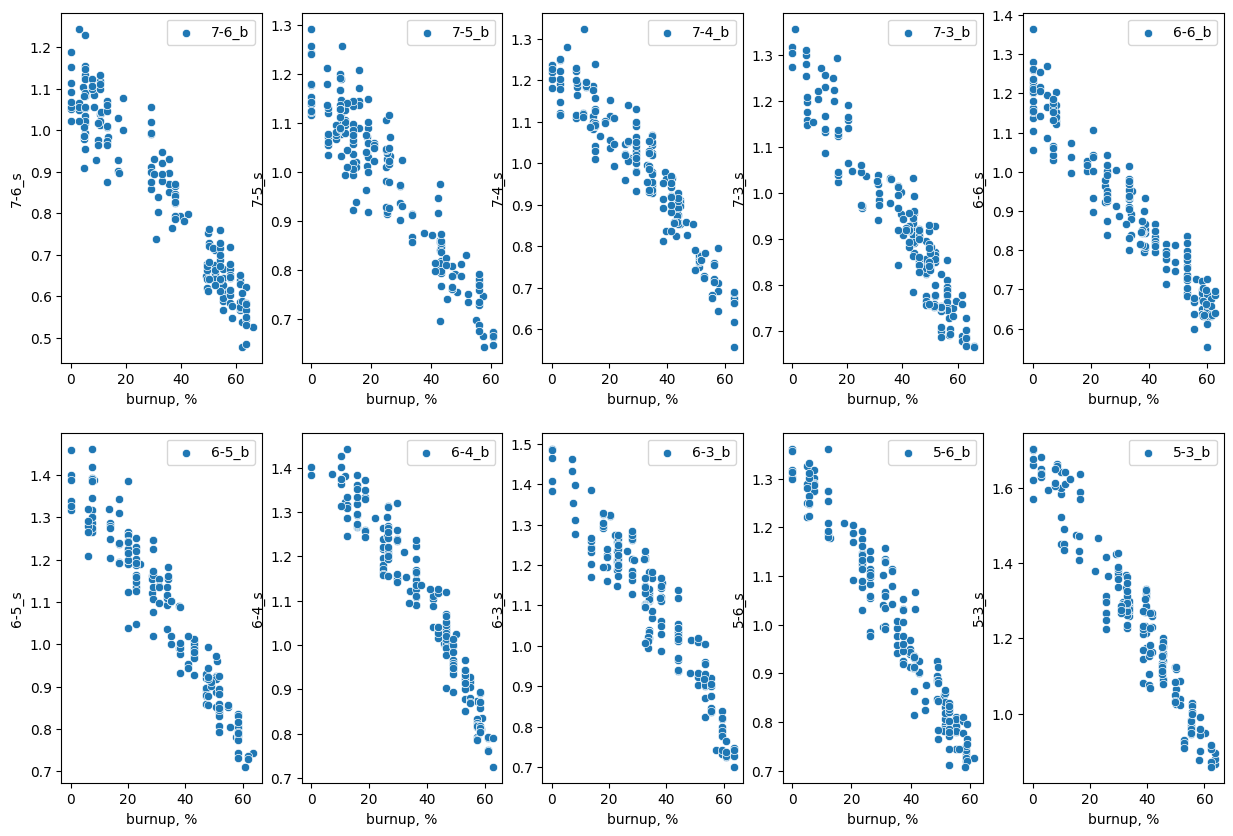

In [16]:
fig, axs = plt.subplots(2,5, figsize=(15,10))
cols1_b = [f"{i}_b" for i in d.CORE_PARTS["default"]["ALL_CELLS"][:10]]
cols1_t = [f"{i}_t" for i in d.CORE_PARTS["default"]["ALL_CELLS"][:10]]
cols1_s = [f"{i}_s" for i in d.CORE_PARTS["default"]["ALL_CELLS"][:10]]
print(axs)
for n in range(2):
    for e in range(5):
        if n == 1:
            e +=5
        print(cols1_b[e])
        sns.scatterplot(x=df[cols1_b[e]]/df[cols1_t[e]]*100, y=df[cols1_s[e]], ax=axs[n][e-5], label=cols1_b[e])
        axs[n][e-5].set_xlabel("burnup, %")

[[<Axes: > <Axes: > <Axes: > <Axes: > <Axes: >]
 [<Axes: > <Axes: > <Axes: > <Axes: > <Axes: >]]
4-6_b
4-3_b
3-6_b
3-5_b
3-4_b
3-3_b
2-6_b
2-5_b
2-4_b
2-3_b


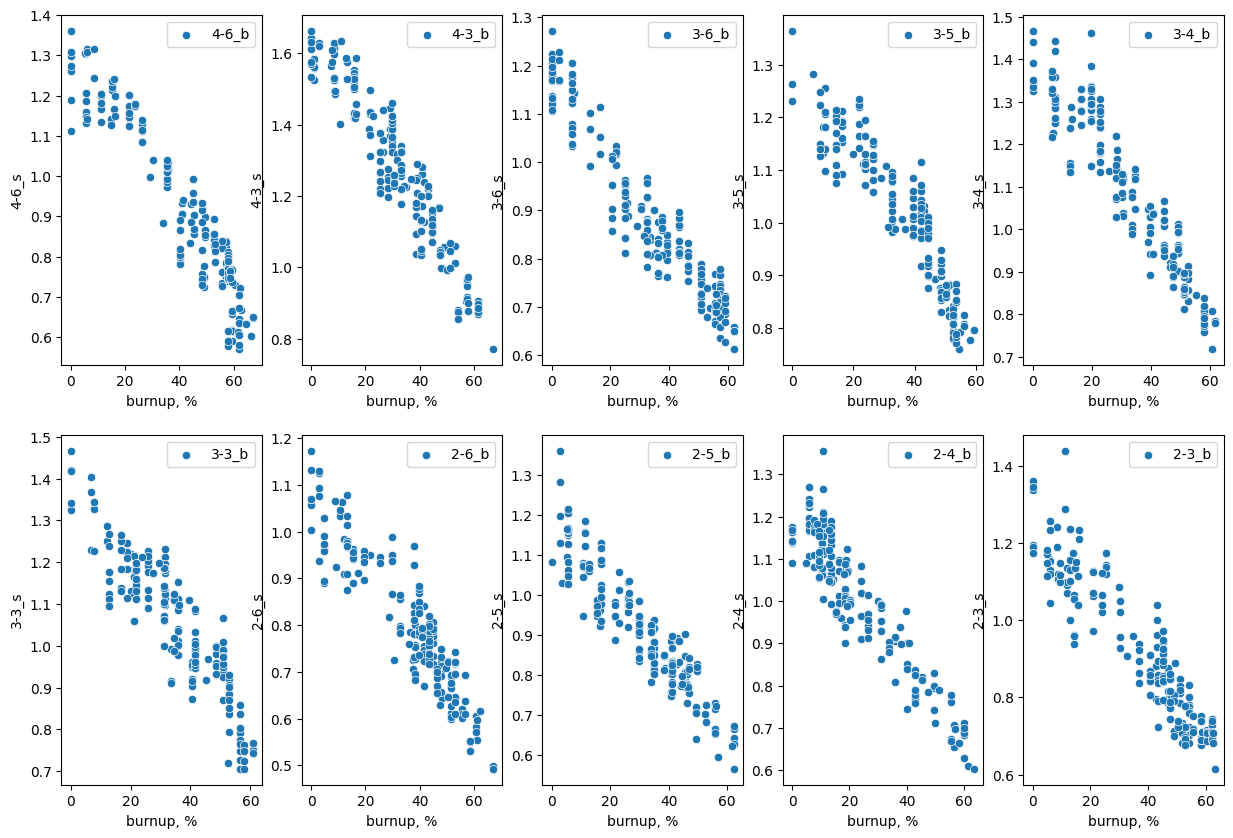

In [17]:
fig, axs = plt.subplots(2,5, figsize=(15,10))
cols1_b = [f"{i}_b" for i in d.CORE_PARTS["default"]["ALL_CELLS"][10:]]
cols1_t = [f"{i}_t" for i in d.CORE_PARTS["default"]["ALL_CELLS"][10:]]
cols1_s = [f"{i}_s" for i in d.CORE_PARTS["default"]["ALL_CELLS"][10:]]
print(axs)
for n in range(2):
    for e in range(5):
        if n == 1:
            e +=5
        print(cols1_b[e])
        sns.scatterplot(x=df[cols1_b[e]]/df[cols1_t[e]]*100, y=df[cols1_s[e]], ax=axs[n][e-5], label=cols1_b[e])
        axs[n][e-5].set_xlabel("burnup, %")

In [56]:
df_counter1 = pd.read_excel("counter_test.xlsx", sheet_name="1")
df_counter2 = pd.read_excel("counter_test.xlsx", sheet_name="2")

<Axes: xlabel='height', ylabel='6-6'>

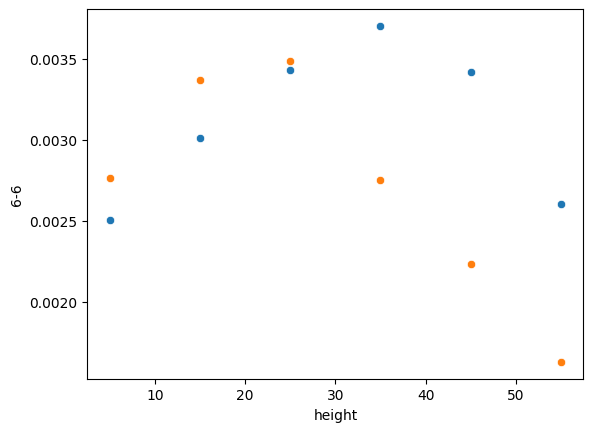

In [57]:
sns.scatterplot(x=df_counter1["height"], y=df_counter1["6-6"])
sns.scatterplot(x=df_counter2["height"], y=df_counter2["6-6"])

<Axes: ylabel='6-6'>

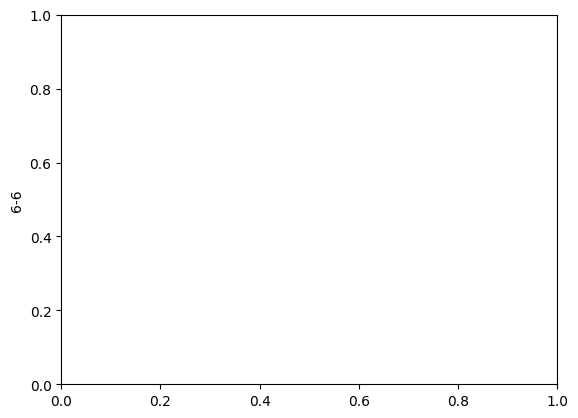

In [66]:
sns.kdeplot(y=df_counter1.loc[:, "6-6"], x=df_counter1.loc[0, "7-6"], warn_singular=False)

/tmp/ipykernel_7948/3706464247.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y=df_counter2.loc[:, "height"], x=df_counter2.loc[:, "6-6"], cmap="Blues", shade=True, thresh=0)


<Axes: xlabel='6-6', ylabel='height'>

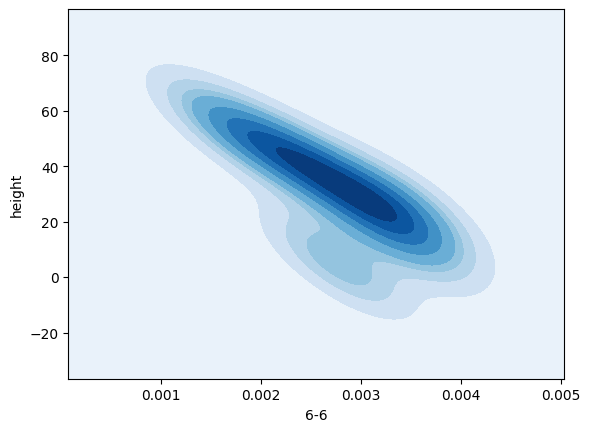

In [61]:
sns.kdeplot(y=df_counter2.loc[:, "height"], x=df_counter2.loc[:, "6-6"], cmap="Blues", shade=True, thresh=0)

In [18]:
from main.graph import Graphs

In [20]:
graph = Graphs(df=df)
graph._make_graph()
graphs = graph.graph

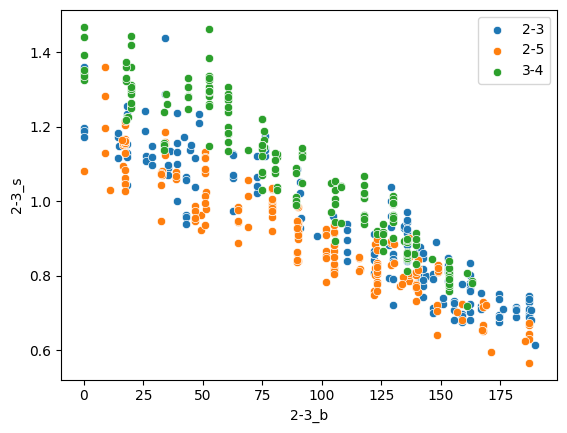

In [21]:
pairs76 = graphs["2-4"]

for i in pairs76:
    sns.scatterplot(x=df[i+"_b"], y=df[i+"_s"], label=i)

<Axes: xlabel='7-6_b', ylabel='7-6_s'>

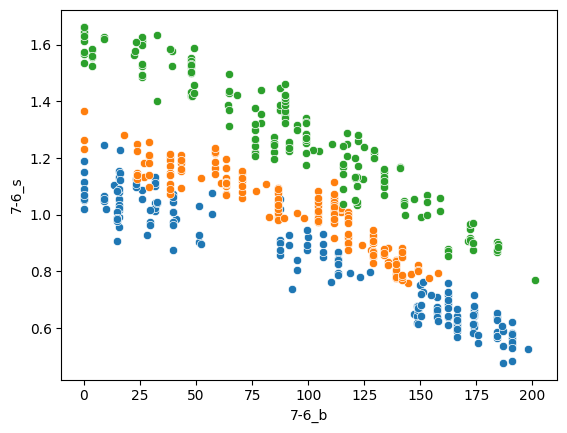

In [22]:
sns.scatterplot(x=df["7-6_b"], y=df["7-6_s"])
sns.scatterplot(x=df["3-5_b"], y=df["3-5_s"])
sns.scatterplot(x=df["4-3_b"], y=df["4-3_s"])

<Axes: xlabel='right_side_s', ylabel='Count'>

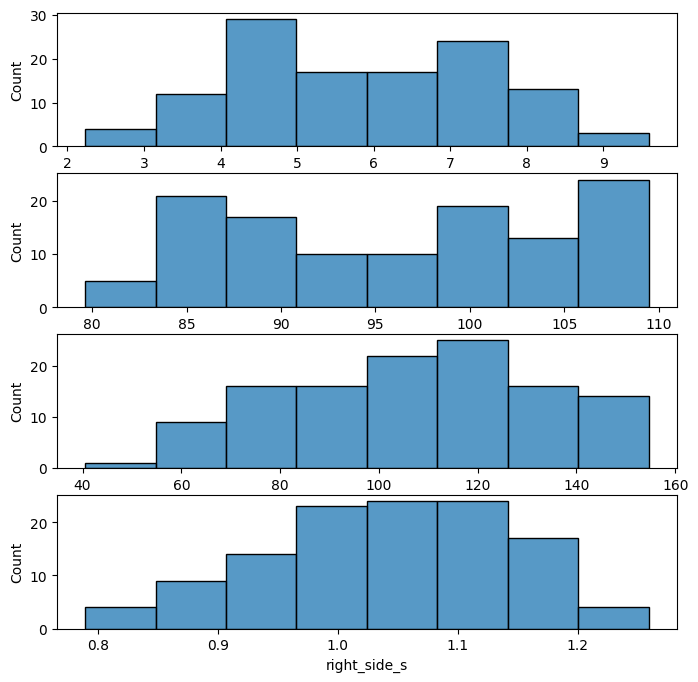

In [20]:
fig, axs = plt.subplots(4,1, figsize=(8,8))
sns.histplot(df["p, %"], ax=axs[0])
sns.histplot(df["average"], ax=axs[1])
sns.histplot(df["right_side"], ax=axs[2])
sns.histplot(df["right_side_s"], ax=axs[3])

<Axes: ylabel='p, %'>

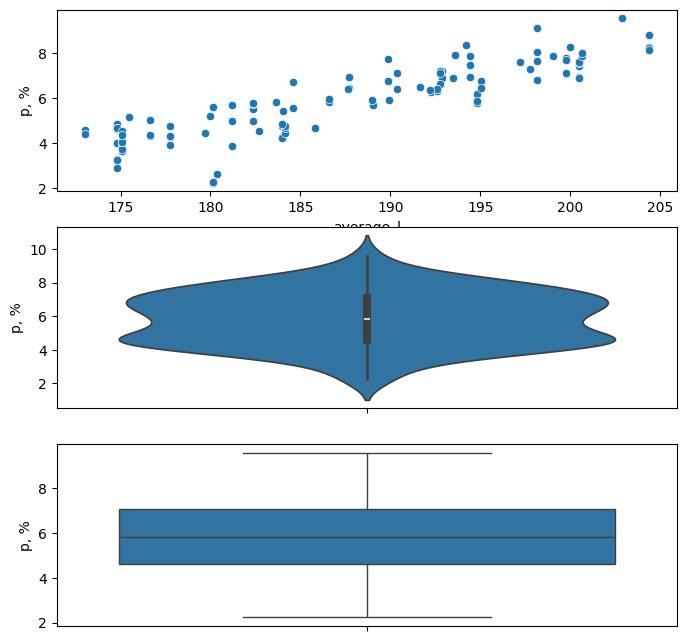

In [21]:
fig, axs = plt.subplots(3,1, figsize=(8,8))
sns.scatterplot(y=df["p, %"], x=df["average_l"], ax=axs[0])
sns.violinplot(df["p, %"], ax=axs[1])
sns.boxplot(df["p, %"], ax=axs[2])

In [22]:
df["cf_max"] = df.loc[:, d.CORE_PARTS["coef"]["ALL_CELLS"]].max(axis=1)

Text(0, 0.5, 'p, %')

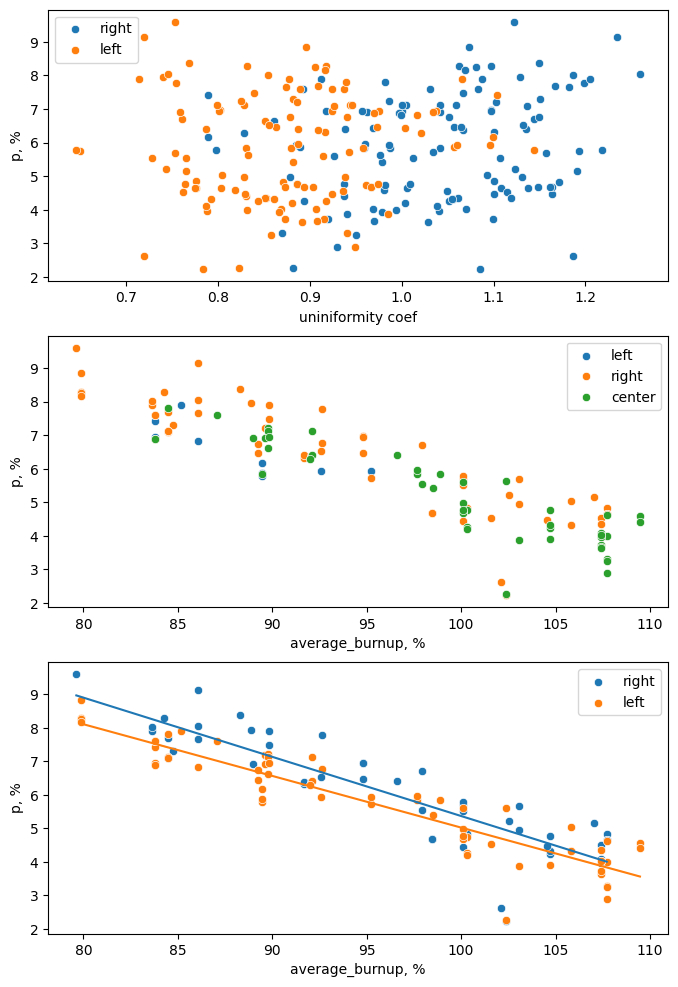

In [23]:
from sklearn.linear_model import  LinearRegression

fig, axs = plt.subplots(3,1, figsize=(8,12))

sns.scatterplot(x=df["right_side_s"], y=df["p, %"], label="right", ax=axs[0])
sns.scatterplot(x=df["left_side_s"], y=df["p, %"], label="left", ax=axs[0])
# sns.scatterplot(x=df["average_burnup"], y=df["p, %"], color="black", label="whole core")
axs[0].set_xlabel("uniniformity coef")

sns.scatterplot(x=df["average"], y=df["p, %"][(df["right_side_s"] < df["left_side_s"]) & (df["center_s"] < df["left_side_s"])], label="left", ax=axs[1])
sns.scatterplot(x=df["average"], y=df["p, %"][(df["right_side_s"] > df["left_side_s"]) & (df["center_s"] < df["right_side_s"])], label="right", ax=axs[1])
sns.scatterplot(x=df["average"], y=df["p, %"][(df["center_s"] > df["left_side_s"]) & (df["center_s"] > df["right_side_s"])], label="center", ax=axs[1])
axs[1].set_xlabel("average_burnup, %")


right = df[["p, %", "average"]][df["right_side"] < df["left_side"]]
left = df[["p, %", "average"]][df["right_side"] > df["left_side"]]

lrr = LinearRegression().fit(right["average"].to_numpy().reshape(-1,1), right["p, %"])
lrl = LinearRegression().fit(left["average"].to_numpy().reshape(-1,1), left["p, %"])

sns.scatterplot(x=right["average"], y=right["p, %"], label="right", ax=axs[2])
sns.lineplot(x=right["average"], y=lrr.predict(right["average"].to_numpy().reshape(-1,1)), ax=axs[2])
sns.scatterplot(x=left["average"], y=left["p, %"], label="left", ax=axs[2])
sns.lineplot(x=left["average"], y=lrl.predict(left["average"].to_numpy().reshape(-1,1)), ax=axs[2])

axs[2].set_xlabel("average_burnup, %")
axs[2].set_ylabel("p, %")

<Axes: >

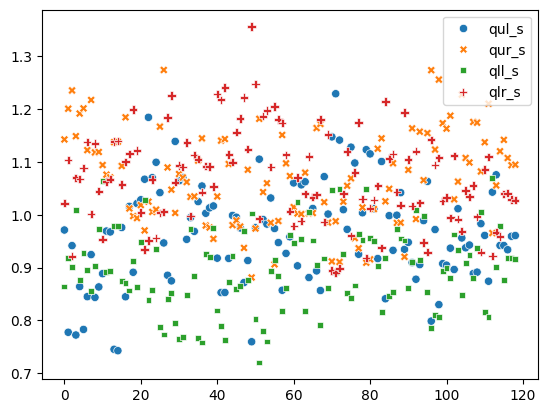

In [24]:
sns.scatterplot(df.loc[:, ["qul_s", "qur_s", "qll_s", "qlr_s"]])

In [25]:
df_hm = df.loc[:, 
        [
            *d.CORE_PARTS["burnup"]["ALL_CELLS"],
            *d.CORE_PARTS["coef"]["ALL_CELLS"]
        ]
    ]
df_hm = df_hm.reindex(sorted(df_hm.columns), axis=1)

In [26]:
df_hm

,2-3_b,2-3_s,2-4_b,2-4_s,2-5_b,2-5_s,2-6_b,2-6_s,3-3_b,3-3_s,...,6-6_b,6-6_s,7-3_b,7-3_s,7-4_b,7-4_s,7-5_b,7-5_s,7-6_b,7-6_s
0,98.07,0.906869,183.96,0.609676,10.83,1.030717,144.540,0.644860,17.9670,1.230191,...,75.7900,0.912569,80.52,1.037370,71.7355,1.013165,144.21,0.790403,0.00,1.051558
1,128.40,0.882171,169.65,0.706128,49.26,0.962203,99.746,0.724846,53.8215,1.218998,...,101.3095,0.795975,118.23,0.954085,42.8400,1.083983,171.99,0.664725,147.06,0.648665
2,128.40,0.795124,169.65,0.654408,49.26,0.921969,99.746,0.707122,53.8215,1.131751,...,101.3095,0.900434,118.23,1.001877,42.8400,1.187454,171.99,0.746294,0.00,1.114553
3,130.11,0.858310,171.06,0.696617,51.21,0.978490,101.018,0.756844,55.8090,1.183820,...,102.5815,0.806680,120.15,0.908672,45.0000,1.041846,173.34,0.642833,148.35,0.641218
4,130.11,0.791606,51.21,0.959940,171.06,0.596557,101.018,0.694601,55.8090,1.119552,...,102.5815,0.843354,120.15,0.942797,0.0000,1.181528,45.00,1.019903,148.35,0.676469
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,142.68,0.772602,28.62,1.055221,123.03,0.811038,39.210,0.975288,82.6005,1.062156,...,87.9800,0.930700,149.04,0.840697,124.2300,0.882367,28.74,1.088872,39.69,0.971585
115,142.68,0.787985,28.62,1.057660,123.03,0.782007,39.210,0.910142,82.6005,1.060371,...,87.9800,0.910114,0.00,1.304821,124.2300,0.919568,28.74,1.127915,39.69,0.973637
116,0.00,1.188770,28.62,1.116583,123.03,0.832883,39.210,0.967479,82.6005,1.071464,...,87.9800,0.905553,0.00,1.274349,124.2300,0.898927,28.74,1.111812,39.69,0.964947
117,0.00,1.173473,28.62,1.094101,123.03,0.829378,39.210,0.969400,82.6005,1.060675,...,87.9800,0.934781,124.23,0.924833,0.0000,1.221129,28.74,1.128648,39.69,1.008633


<Axes: >

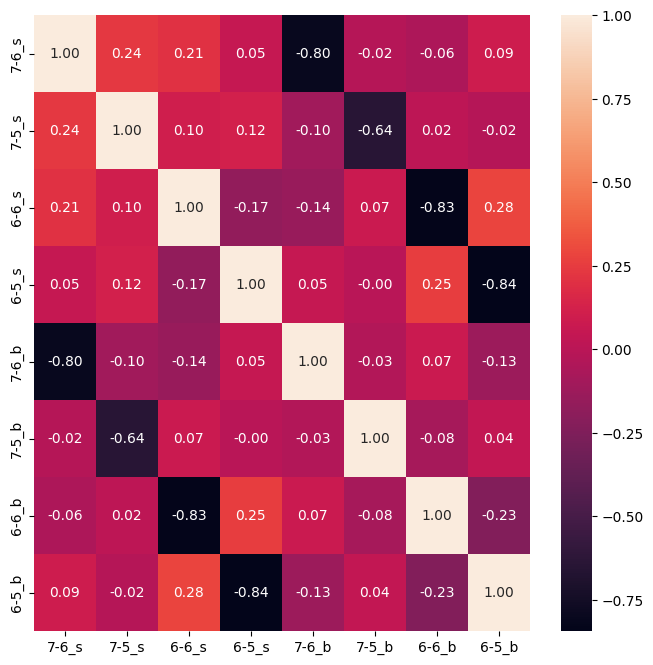

In [27]:
plt.figure(figsize=(8,8))
sns.heatmap(
    df_hm.loc[:, [
            *d.CORE_PARTS["coef"]["ALL_CELLS"][:2],
            *d.CORE_PARTS["coef"]["ALL_CELLS"][4:6],
            *d.CORE_PARTS["burnup"]["ALL_CELLS"][:2],
            *d.CORE_PARTS["burnup"]["ALL_CELLS"][4:6],
        ]
    ].corr(method="kendall"), 
    annot=True,
    fmt=".2f"
)

<Axes: >

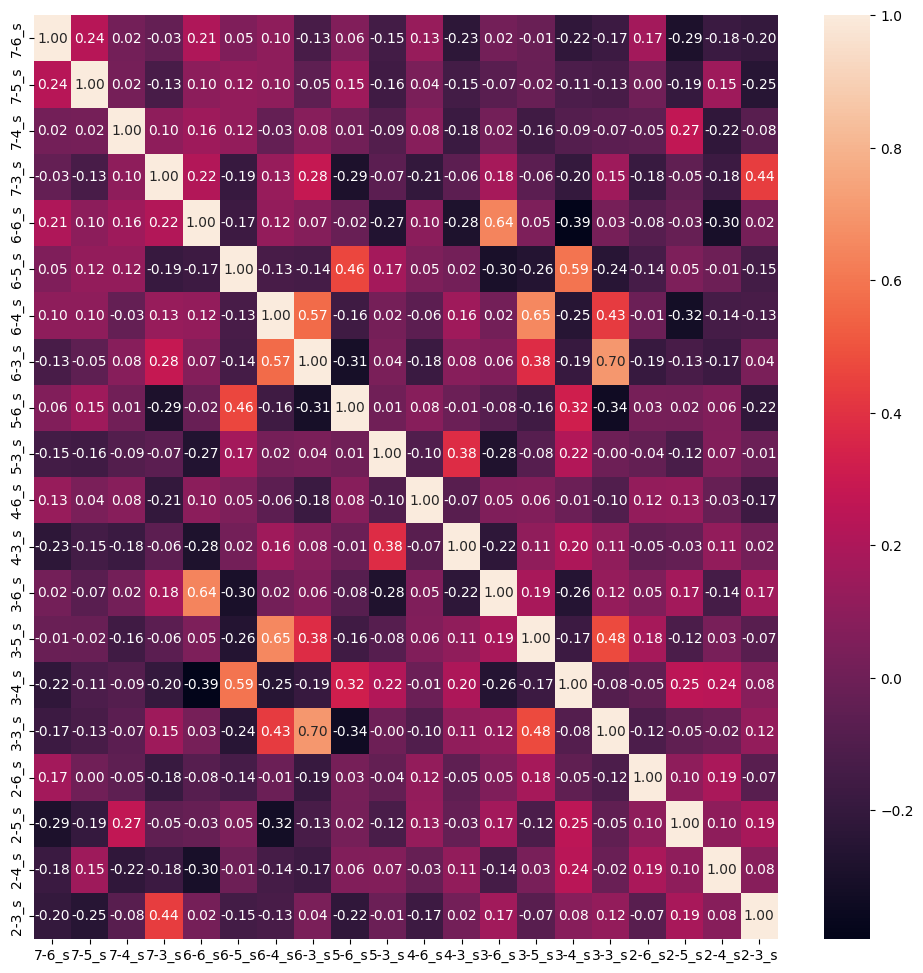

In [28]:
plt.figure(figsize=(12,12))
sns.heatmap(
    df.loc[:, 
        [
            *d.CORE_PARTS["coef"]["ALL_CELLS"],
        ]
    ].corr(method="kendall"), 
    annot=True,
    fmt=".2f"
)